In [5]:
import pandas as pd
import numpy as np

# steps

In [6]:
# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output coloumns
# 2. Train Test split
# 3. Scale the values
# 4. Train the model
# 5. Evaluate the model/model selsection
# 6. Deploy the model

In [7]:
# Preprocess + EDA + Feature Selection

In [8]:
df = pd.read_csv('placement.csv')

In [9]:
df.sample(5)

,Unnamed: 0,cgpa,iq,placement
53,53,8.3,168.0,1
97,97,6.7,182.0,1
18,18,4.0,100.0,0
7,7,5.0,63.0,0
45,45,6.0,66.0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [11]:
df.shape

(100, 4)

In [12]:
df = df.iloc[:,1:] # removes first column
# : means select all rows, 1: means select all coloumns from
# index 1 to the end

In [13]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [14]:
df.shape

(100, 3)

# Steps

In [15]:
import matplotlib.pyplot as plt

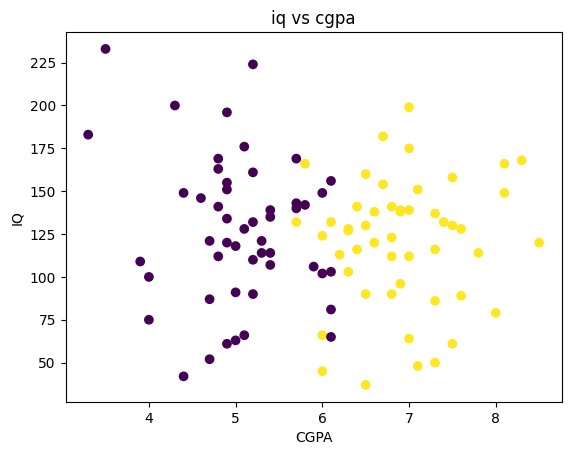

In [16]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("iq vs cgpa")
plt.show()

In [17]:
# Extract input output colomns

In [18]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [19]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [20]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [21]:
# Train, Test, Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [24]:
# X_train
# X_test
# y_train
# y_test

In [25]:
# scale the values

In [26]:
from sklearn.preprocessing import StandardScaler
# scales data to have mean = 0(centers the data)
# and standard deviation = 1(normalizes the spread)

In [27]:
scaler = StandardScaler() # object of StandarScaler
X_train = scaler.fit_transform(X_train)
# for each feature of x; z=x-μ/​σ

In [28]:
X_train

array([[-0.14880192,  0.453505  ],
       [-0.9365768 , -0.09569372],
       [ 0.02625916,  0.0041606 ],
       [-0.49892409, -0.24547518],
       [-1.81188222, -0.37029307],
       [-0.58645463, -0.07073014],
       [ 0.7265035 , -0.84460106],
       [ 1.16415621, -0.94445537],
       [-1.02410734,  1.12752161],
       [ 1.86440055,  0.62825005],
       [ 0.81403404,  0.35365069],
       [-0.23633246,  0.40357784],
       [-0.67398518, -0.3453295 ],
       [ 0.90156459, -0.29540234],
       [-1.02410734,  0.42854142],
       [ 1.16415621, -1.84314418],
       [-0.49892409,  0.37861427],
       [-0.9365768 ,  1.80153821],
       [ 0.02625916,  0.62825005],
       [-0.9365768 ,  0.77803151],
       [-0.49892409,  0.27875995],
       [-0.67398518,  2.5005184 ],
       [-0.49892409, -0.42022023],
       [ 0.28885079,  0.10401491],
       [ 0.1137897 , -0.52007454],
       [ 1.3392173 ,  0.85292225],
       [ 2.21452272, -0.09569372],
       [ 1.3392173 ,  0.15394206],
       [-1.72435168,

In [29]:
X_test = scaler.transform(X_test)

In [30]:
X_test

array([[-0.23633246,  1.12752161],
       [ 0.7265035 ,  0.42854142],
       [ 0.20132025, -0.27043876],
       [ 0.90156459, -1.49365408],
       [-1.11163789, -0.07073014],
       [-0.58645463, -0.24547518],
       [ 2.03946163,  1.10255803],
       [ 0.1137897 ,  0.20386922],
       [-1.11163789, -1.79321702],
       [ 0.90156459,  0.37861427]])

In [31]:
# Model Train

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
clf = LogisticRegression() # object

In [34]:
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [35]:
# Evaluate Model

In [36]:
y_pred = clf.predict(X_test)

In [37]:
y_test

84    0
43    1
99    1
64    1
24    0
46    0
53    1
71    1
94    0
32    1
Name: placement, dtype: int64

In [38]:
y_pred

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test, y_pred)

1.0

In [41]:
from mlxtend.plotting import plot_decision_regions

ModuleNotFoundError: No module named 'mlxtend'

<Axes: >

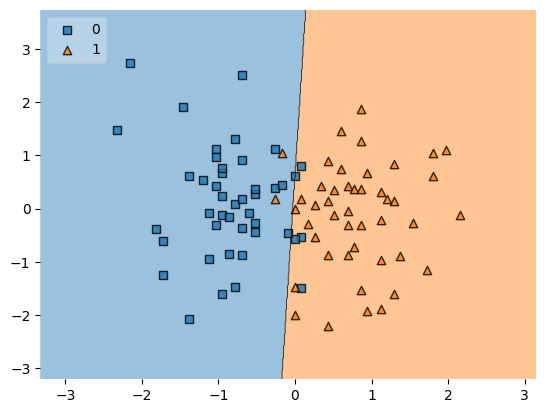

In [ ]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))